In [2]:
import numpy as np


class Network:
    def __init__(self, xmin, xmax, ymin, ymax):
        """
        xmin: 150,
        xmax: 450, 
        ymin: 100, 
        ymax: 600
        """
        
        self.StaticDiscipline = {
            'xmin': xmin, 
            'xmax': xmax, 
            'ymin': ymin, 
            'ymax': ymax
        }

    def network(self, xsource, ysource = 100, Ynew = 600, divisor = 50): #ysource will always be 100
        """
        For Network A
        ysource: will always be 100
        xsource: will always be between xmin and xmax (static discipline)
        
        For Network B
        ysource: will always be 600
        xsource: will always be between xmin and xmax (static discipline)
        """
        
        while True:
            ListOfXsourceYSource = []
            Xnew = np.random.choice([i for i in range(self.StaticDiscipline['xmin'], self.StaticDiscipline['xmax'])], 1)
            #Ynew = np.random.choice([i for i in range(self.StaticDiscipline['ymin'], self.StaticDiscipline['ymax'])], 1)

            source = (xsource, ysource)
            target = (Xnew[0], Ynew)

            #Slope and intercept
            slope = (ysource - Ynew)/(xsource - Xnew[0])
            intercept = ysource - (slope*xsource)
            if (slope != np.inf) and (intercept != np.inf):
                break
            else:
                continue
                
        #print(source, target)
        # randomly select 50 new values along the slope between xsource and xnew (monotonically decreasing/increasing)
        XNewList = [xsource]

        if xsource < Xnew:
            differences = Xnew[0] - xsource
            increment = differences /divisor
            newXval = xsource
            for i in range(divisor):

                newXval += increment
                XNewList.append(int(newXval))
        else:
            differences = xsource - Xnew[0]
            decrement = differences /divisor
            newXval = xsource
            for i in range(divisor):

                newXval -= decrement
                XNewList.append(int(newXval))
                

        #determine the values of y, from the new values of x, using y= mx + c
        yNewList = []
        for i in XNewList:
            findy = (slope * i) + intercept#y = mx + c
            yNewList.append(int(findy))

        ListOfXsourceYSource = [(x, y) for x, y in zip(XNewList, yNewList)]

        return XNewList, yNewList
    

    
   

In [3]:
# Testing
net = Network(150,450,100,600)
NetworkA = net.network(300, ysource = 100, Ynew = 600) #Network A
NetworkB = net.network(200, ysource = 600, Ynew = 100) #Network B
#NetworkA

In [ ]:
import seaborn as sns
sns.jointplot(NetworkA[0], NetworkA[1])

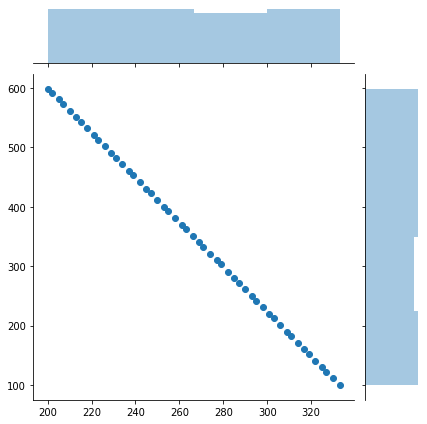

In [5]:
sns.jointplot(NetworkB[0], NetworkB[1])

In [6]:
#NetworkB

In [7]:
DefaultPositionA = 300
DefaultPositionB = 300

def DefaultToPosition(x1, x2 = 300, divisor = 50):
    XNewList = []
    if x1 < x2:
        differences = x2 - x1
        increment = differences /divisor
        newXval = x1
        for i in range(divisor):
            newXval += increment
            XNewList.append(int(np.floor(newXval)))
            
    else:
        differences = x1 - x2
        decrement = differences /divisor
        newXval = x1
        for i in range(divisor):
            newXval -= decrement
            XNewList.append(int(np.floor(newXval)))
    return XNewList
            
            
out = DefaultToPosition(250)
print(out)

[251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300]


In [8]:
j, x, y = next(zip(out, NetworkA[0], NetworkA[1]))
print(j, x, y)

251 300 100


In [11]:
import pygame, sys
from pygame.locals import *
pygame.init()
import time

FPS = 50
fpsClock = pygame.time.Clock()

# set up the window
DISPLAYSURF = pygame.display.set_mode((600, 700), 0, 32)
pygame.display.set_caption('REINFORCEMENT LEARNING (Discrete Mathematics) - TABLE TENNIS')
# set up the colors
BLACK = ( 0,0,0)
WHITE = (255, 255, 255)
RED= (255,0,0)
GREEN = ( 0, 255,0)
BLUE = ( 0,0, 255)

# draw on the surface object
def display():
    DISPLAYSURF.fill(WHITE)
    pygame.draw.rect(DISPLAYSURF, GREEN, (150, 100, 300, 500))
    pygame.draw.rect(DISPLAYSURF, RED, (150, 340, 300, 20))
    pygame.draw.rect(DISPLAYSURF, BLACK, (0, 20, 600, 20))
    pygame.draw.rect(DISPLAYSURF, BLACK, (0, 660, 600, 20))
    return

# pixObj = pygame.PixelArray(DISPLAYSURF)
# del pixObj


PLAYERA = pygame.image.load('images/cap.jpg')
PLAYERA = pygame.transform.scale(PLAYERA, (50, 50))
PLAYERB = pygame.image.load('images/cap.jpg')
PLAYERB = pygame.transform.scale(PLAYERB, (50, 50))
ball = pygame.image.load('images/ball.png')
ball = pygame.transform.scale(ball, (15, 15))

playerax = 150
playerbx = 250
directionA = 'right'
directionB = 'right'
ballDirection = 'top'
ballx = 250
bally = 300



nextplayer = 'A'
lastxcoordinate = 350
count = 0
while True:
    display()
    if nextplayer == 'A':
        #playerA should play
        if count == 0:
            #playerax = lastxcoordinate
            NetworkA = net.network(lastxcoordinate, ysource = 100, Ynew = 600) #Network A
            out = DefaultToPosition(lastxcoordinate)
            
            #update lastxcoordinate
            
            bally = NetworkA[1][count]
            playerax = ballx
            count += 1
#             soundObj = pygame.mixer.Sound('sound/sound.wav')
#             soundObj.play()
#             time.sleep(0.4)
#             soundObj.stop()
        else:
            ballx = NetworkA[0][count]
            bally = NetworkA[1][count]
            playerbx = ballx
            playerax = out[count]
            count += 1
        
        #let playerB play after 50 new coordinate of ball movement
        if count == 49:
            count = 0
            nextplayer = 'B'
        else:
            nextplayer = 'A'
            

            
        
        
    else:
        #playerB can play
        if count == 0:
            #playerbx = lastxcoordinate
            NetworkB = net.network(lastxcoordinate, ysource = 600, Ynew = 100) #Network B
            out = DefaultToPosition(lastxcoordinate)
            
            #update lastxcoordinate
            bally = NetworkB[1][count]
            playerbx = ballx
            count += 1
            
#             soundObj = pygame.mixer.Sound('sound/sound.wav')
#             soundObj.play()
#             time.sleep(0.4)
#             soundObj.stop()
        else:
            ballx = NetworkB[0][count]
            bally = NetworkB[1][count]
            playerbx = out[count]
            playerax = ballx
            count += 1
        #update lastxcoordinate
        
        #let playerA play after 50 new coordinate of ball movement
        if count == 49:
            count = 0
            nextplayer = 'A'
        else:
            nextplayer = 'B'
    
        
        
            
    #CHECK BALL MOVEMENT
    DISPLAYSURF.blit(PLAYERA, (playerax, 50))
    DISPLAYSURF.blit(PLAYERB, (playerbx, 600))
    DISPLAYSURF.blit(ball, (ballx, bally))
    
    #update last coordinate
    lastxcoordinate = ballx 
    


    pygame.display.update()
    fpsClock.tick(FPS)
    
    for event in pygame.event.get():

        if event.type == QUIT:
            pygame.quit()
            sys.exit()
    
            
        
        
        
            
            
    

SystemExit: 

/home/qwerty/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
